In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [13]:
import yfinance as yf
import riskfolio as rp
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

start="2022-01-01"

assets = ["BNP.PA","ACA.PA","AC.PA","ORA.PA","AI.PA"]
data = yf.download(assets,start=start)

[*********************100%***********************]  5 of 5 completed


In [14]:
data.head()

Price           Close                                                   High  \
Ticker          AC.PA     ACA.PA       AI.PA     BNP.PA    ORA.PA      AC.PA   
Date                                                                           
2022-01-03  27.799088   9.838484  121.023193  49.939327  7.713046  27.988971   
2022-01-04  28.900417  10.071741  123.357491  51.612133  7.767063  29.204232   
2022-01-05  28.928898  10.172149  125.362785  51.677410  7.734325  29.194737   
2022-01-06  28.985867  10.289550  122.981483  52.379173  7.719593  29.384624   
2022-01-07  29.061819  10.393047  122.542839  52.632130  7.717137  29.280186   

Price                                                   ...       Open  \
Ticker         ACA.PA       AI.PA     BNP.PA    ORA.PA  ...      AC.PA   
Date                                                    ...              
2022-01-03   9.894095  122.448834  50.175969  7.771155  ...  27.049043   
2022-01-04  10.152068  123.451497  52.011975  7.807986  ...  28.226327   
2022-01-05  10.297273  125.362785  52.444448  7.791617  ...  28.871933   
2022-01-06  10.297274  125.018132  52.493413  7.744965  ...  28.482672   
2022-01-07  10.440934  123.623815  52.648447  7.740054  ...  29.223221   

Price                                                    Volume           \
Ticker         ACA.PA       AI.PA     BNP.PA    ORA.PA    AC.PA   ACA.PA   
Date                                                                       
2022-01-03   9.747344  120.788198  49.865887  7.719593   524091  4846202   
2022-01-04   9.894096  121.665514  50.331010  7.743329  1422637  6062208   
2022-01-05  10.098001  123.169479  51.824288  7.782613   653053  6300320   
2022-01-06  10.111904  124.078137  51.391808  7.734324   809845  7442277   
2022-01-07  10.303452  122.370503  52.224129  7.721230   506225  8210181   

Price                                  
Ticker       AI.PA   BNP.PA    ORA.PA  
Date                                   
2022-01-03  580193  2177649   6450743  
2022-01-04  905098  3614427   8585931  
2022-01-05  973648  3910434   9980707  
2022-01-06  946683  3645405  10120682  
2022-01-07  841561  3446590   6559974  

[5 rows x 25 columns]

In [15]:
# calcul des rendements (actuel - précedent / précédent)
returns = data["Close"].pct_change().dropna()
returns

Ticker,AC.PA,ACA.PA,AI.PA,BNP.PA,ORA.PA
Date,,,,,
2022-01-04,0.039617,0.023709,0.019288,0.033497,0.007003
2022-01-05,0.000985,0.009969,0.016256,0.001265,-0.004215
2022-01-06,0.001969,0.011541,-0.018995,0.013580,-0.001905
2022-01-07,0.002620,0.010059,-0.003567,0.004829,-0.000318
2022-01-10,0.004900,0.005351,-0.002301,-0.007752,0.021211
...,...,...,...,...,...
2024-12-24,0.001292,-0.008829,0.000648,0.001741,0.002744
2024-12-27,0.005376,0.024400,0.010108,0.017379,0.008840
2024-12-30,-0.001070,0.006049,-0.008210,0.003246,0.004590


In [43]:
  ## assets_stats function
# Objectives functions : at the top of the https://riskfolio-lib.readthedocs.io/en/latest/portfolio.html page
#The method used to estimate the expected returns hist historical estimates.
method_mu  = "hist"

#The method used to estimate the covariance matrix , historical estimates.
method_cov  = "hist"


 ## Optimization function
#The model used for optimize the portfolio 'Classic', 'BL', 'FM' or 'BLFM'
model ="Classic" 

#The risk measure used to optimize the portfolio.Standard Deviation.
risk_measure = "MDD"

#Objective function of the optimization model. 'MinRisk', 'Utility', 'Sharpe' or 'MaxRet'
obj='Sharpe'

#Risk free rate,Risk aversion factor, kind of return
rf=0 
l=0
hist=True

"""
’MV’: Standard Deviation.              ’KT’: Square Root of Kurtosis.         ’MAD’: Mean Absolute Deviation.                    ’GMD’: Gini Mean Difference.    -    
’MSV’: Semi Standard Deviation.        ’SKT’: Square Root of Semi Kurtosis.   ’FLPM’: First Lower Partial Moment (Omega Ratio).  ’SLPM’: Second Lower Partial Moment (Sortino Ratio).    
’CVaR’: Conditional Value at Risk.     ’TG’: Tail Gini.                       ’EVaR’: Entropic Value at Risk.                    ’RLVaR’: Relativistic Value at Risk.    -    
’WR’: Worst Realization (Minimax).     ’RG’: Range of returns.                ’CVRG’: CVaR range of returns.                     ’TGRG’: Tail Gini range of returns.    -    
’MDD’: Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).    ’ADD’: Average Drawdown of uncompounded cumulative returns.    
’EDaR’: Entropic Drawdown at Risk of uncompounded cumulative returns.         ’RLDaR’: Relativistic Drawdown at Risk of uncompounded cumulative returns.
’CDaR’: Conditional Drawdown at Risk of uncompounded cumulative returns.      ’UCI’: Ulcer Index of uncompounded cumulative returns.
"""


'\n’MV’: Standard Deviation.              ’KT’: Square Root of Kurtosis.         ’MAD’: Mean Absolute Deviation.                    ’GMD’: Gini Mean Difference.    -    \n’MSV’: Semi Standard Deviation.        ’SKT’: Square Root of Semi Kurtosis.   ’FLPM’: First Lower Partial Moment (Omega Ratio).  ’SLPM’: Second Lower Partial Moment (Sortino Ratio).    \n’CVaR’: Conditional Value at Risk.     ’TG’: Tail Gini.                       ’EVaR’: Entropic Value at Risk.                    ’RLVaR’: Relativistic Value at Risk.    -    \n’WR’: Worst Realization (Minimax).     ’RG’: Range of returns.                ’CVRG’: CVaR range of returns.                     ’TGRG’: Tail Gini range of returns.    -    \n’MDD’: Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).    ’ADD’: Average Drawdown of uncompounded cumulative returns.    \n’EDaR’: Entropic Drawdown at Risk of uncompounded cumulative returns.         ’RLDaR’: Relativistic Drawdown at Risk of uncompounded cumulative retu

## Optimize

In [69]:
port = rp.Portfolio(returns=returns)

# hyperparameters, to define a model that will respect them while finding a solution
port.uppermdd = 0.8 #Constraint on max level of maximum drawdown of uncompounded cumulative returns.
port.lowerret = 0.2/252 # Constraint on min level of expected return.

#Calculate the inputs that will be used by the optimization method
port.assets_stats(method_mu,method_cov)

#This method that calculates the optimal portfolio according to the optimization model
weight = port.optimization(model=model,rm=risk_measure,obj=obj,rf=rf,l=l,hist=hist)

## Plotting

             weights
AC.PA   8.925688e-01
ACA.PA  1.738234e-10
AI.PA   1.074311e-01
BNP.PA  8.977374e-12
ORA.PA  7.677894e-09


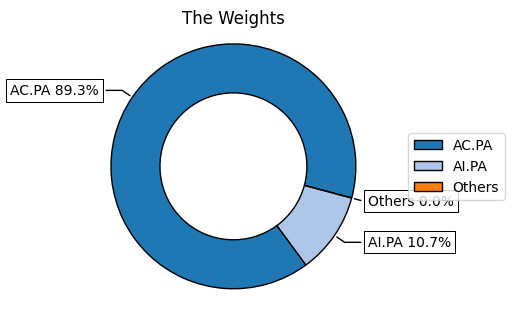

In [70]:
print(weight)
ax = rp.plot_pie(w = weight,title="The Weights",height=3,width =5)
# the weights represent the optimal portfolio to have

the weight represent the part of a asset in a optimal portefolio (sum = 1)

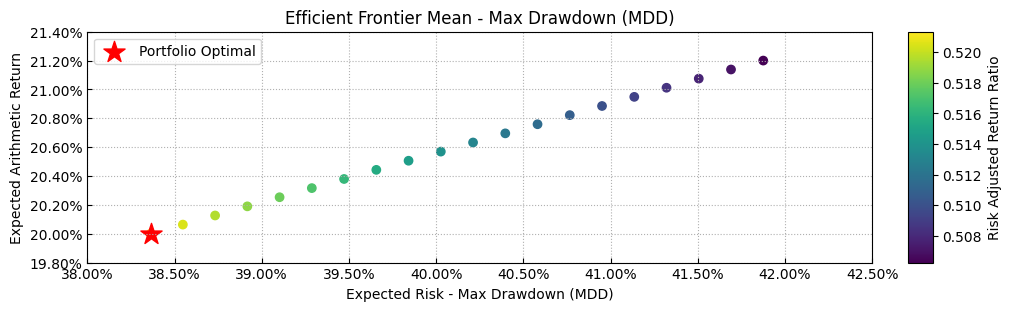

In [71]:
# the frontier map represent the retutn depending of the risk over 20 simulations
frontier = port.efficient_frontier(model = model,rm=risk_measure,rf = rf,hist=hist, points=20)
ax = rp.plot_frontier(w_frontier=frontier,returns=returns,mu=port.mu,cov=port.cov,rm=risk_measure,rf = rf, cmap='viridis',w=weight,height=3,width =10,label="Portfolio Optimal")



In [72]:
# the composition of the portefolio for each point. The optimal portefolio ( the star) is approximativelly the 3rd point
frontier

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
AC.PA,8.925688e-01,8.982298e-01,9.038907e-01,9.095516e-01,9.152125e-01,9.208734e-01,9.265343e-01,9.321952e-01,9.378561e-01,9.435170e-01,9.491779e-01,9.548389e-01,9.604998e-01,9.661607e-01,9.718216e-01,9.774825e-01,9.831434e-01,9.888043e-01,9.944652e-01,1.000000e+00
ACA.PA,1.014667e-12,2.013266e-13,9.872273e-12,1.999191e-12,2.699971e-12,2.472398e-12,2.836654e-12,5.444022e-13,7.379820e-12,2.187190e-11,2.445785e-11,2.076164e-11,1.509457e-11,1.005120e-11,9.738710e-12,1.059780e-11,1.279917e-11,1.733080e-11,1.731606e-11,7.667162e-13
AI.PA,1.074312e-01,1.017702e-01,9.610933e-02,9.044842e-02,8.478751e-02,7.912660e-02,7.346569e-02,6.780478e-02,6.214387e-02,5.648296e-02,5.082205e-02,4.516114e-02,3.950023e-02,3.383932e-02,2.817841e-02,2.251750e-02,1.685659e-02,1.119568e-02,5.534770e-03,8.465605e-11
BNP.PA,1.115704e-12,1.916971e-13,9.146102e-12,1.895029e-12,2.740569e-12,2.913492e-12,3.635618e-12,4.802617e-13,7.373764e-12,2.080933e-11,2.481623e-11,2.401381e-11,2.155724e-11,1.913630e-11,2.026795e-11,2.182271e-11,2.355786e-11,2.505046e-11,1.601902e-11,7.441219e-13
ORA.PA,2.700855e-11,1.569341e-12,6.405609e-11,1.581409e-11,2.544262e-11,3.239940e-11,4.394634e-11,4.369550e-12,1.417235e-10,3.030624e-10,3.577730e-10,3.545124e-10,3.297987e-10,2.996242e-10,3.190523e-10,3.425921e-10,3.649446e-10,3.816198e-10,2.639766e-10,6.288758e-12


In [75]:
# study the composition of the 14th point 
#

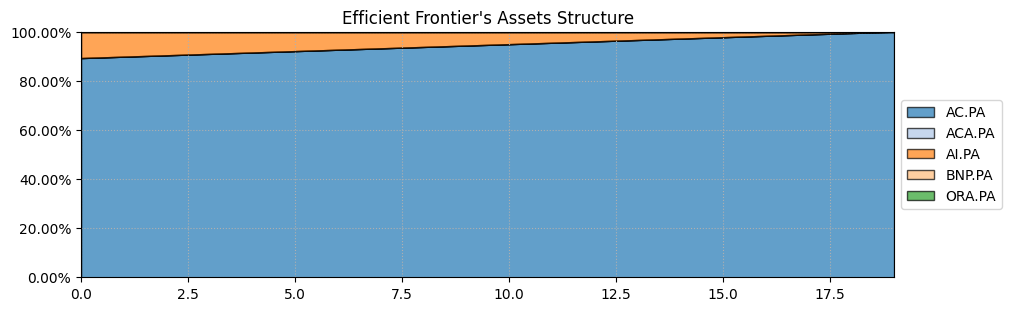

In [74]:
# ploting the best combinaison of assets for by risk/return level.
# exemple : for a hier risk but returns, we must invest all on ACA 
# in x we have the points above, in y the % of each asset

ax = rp.plot_frontier_area(frontier,height=3,width =10)

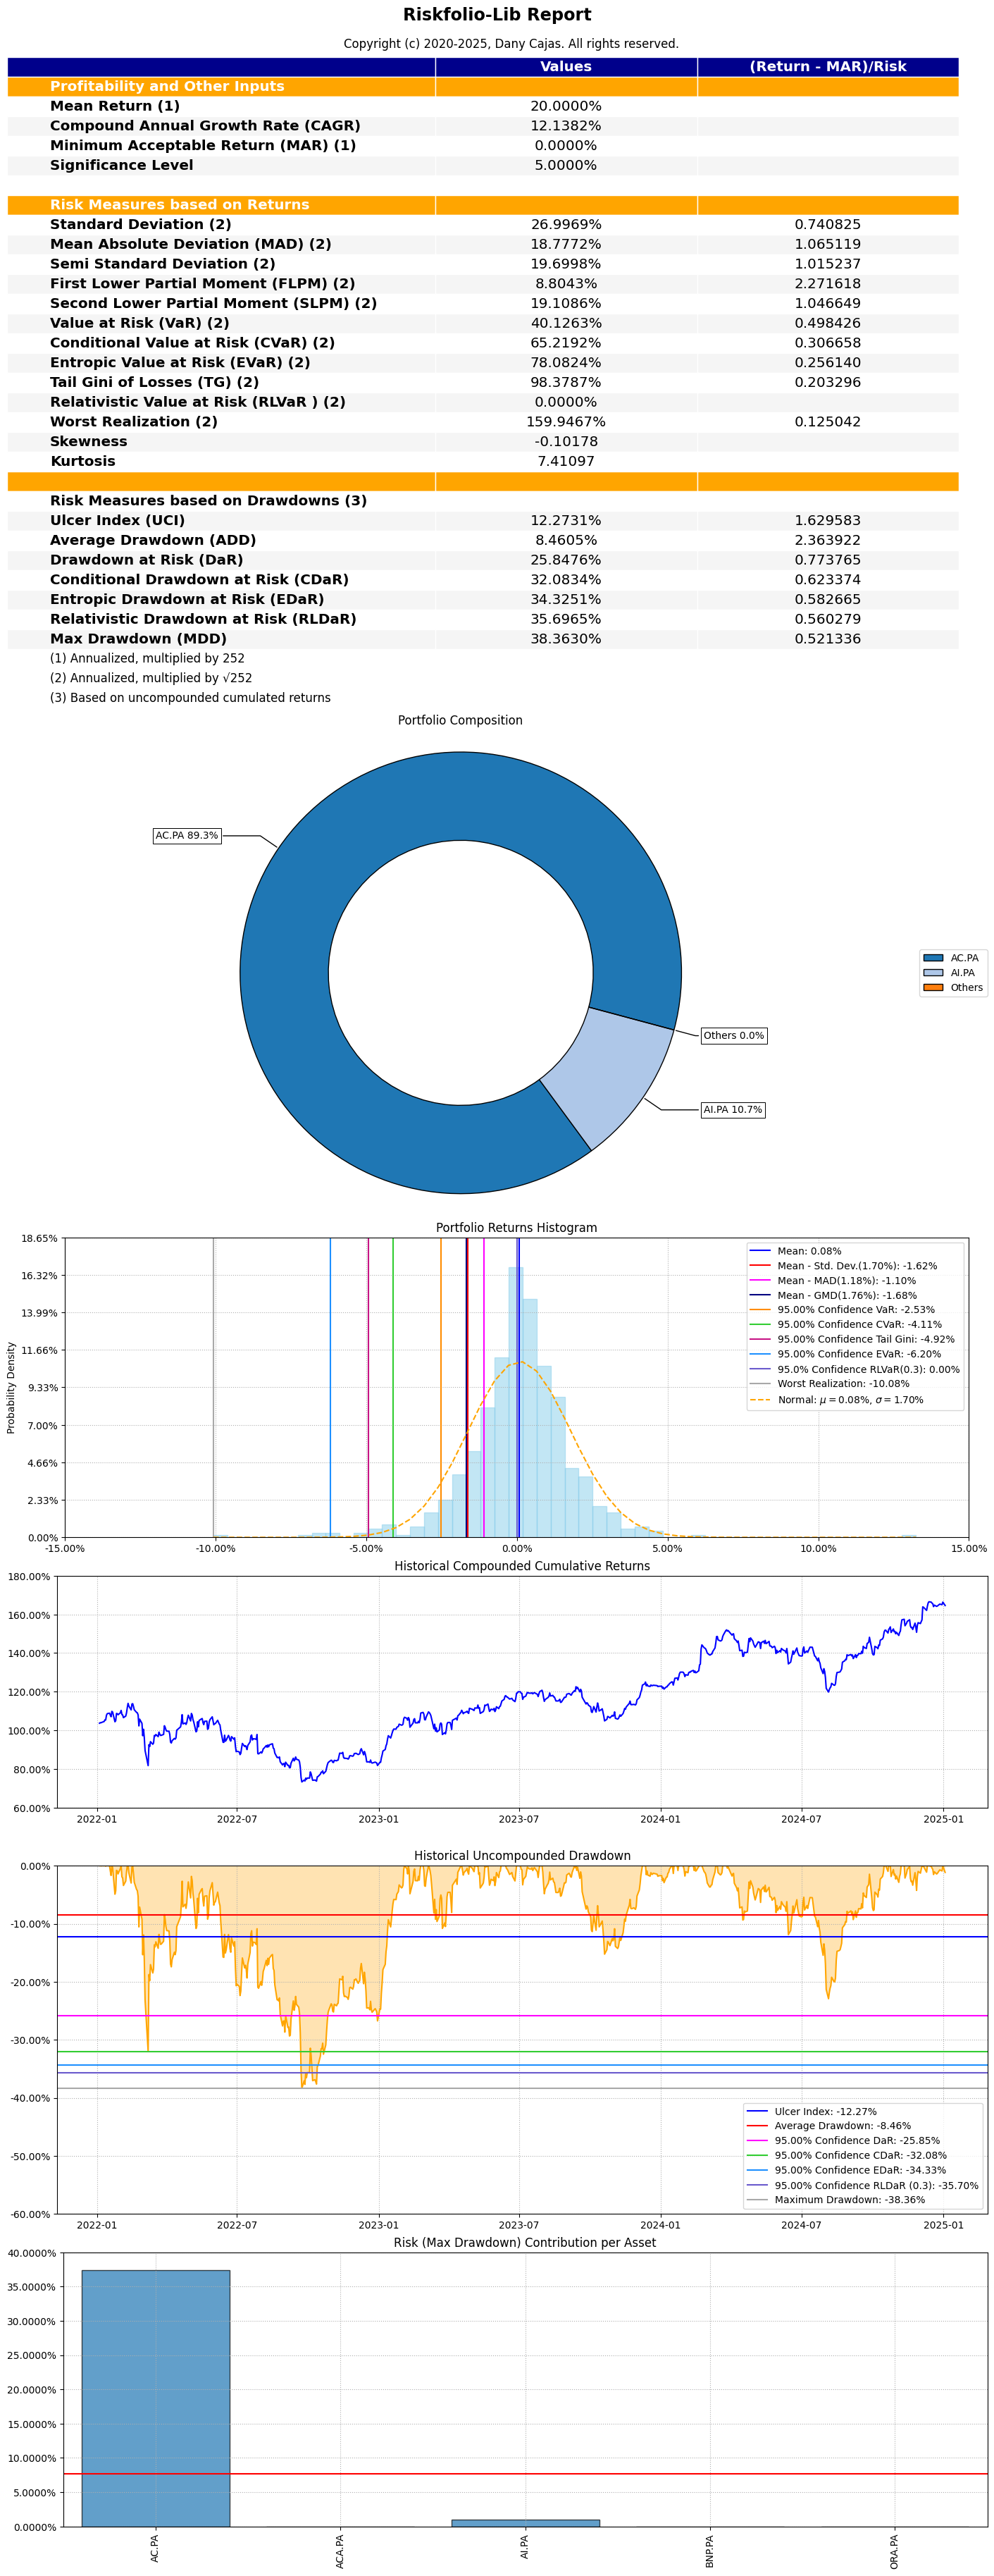

In [76]:
# a generated report
ax = rp.jupyter_report(returns,weight,rm=risk_measure)